Se importan las librerías necesarias para el funcionamiento del programa

In [2]:
import cv2 as cv
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt
import sys

from ipywidgets import interactive, widgets, Layout

%matplotlib inline 
# se importa el modulo de vision
from pv_vision.transform_crop.solarmodule import MaskModule

Uso de la herramienta para recortar una imagen de módulo en celdas individuales usando el método de detección de contornos.



1. `img = cv.imread('/home/franklin/PVDefectDetect/EjemplosPV-vision/module_imgs/example_3.jpg', 0)`: Esta línea está utilizando la función `imread` de la biblioteca OpenCV (cv) para leer una imagen en escala de grises (el segundo argumento '0' indica esto) desde la ruta especificada.

2. `raw_module = MaskModule(img, 6, 12, 3) # 6 rows && 12 columns && 3 busbar`: Esta línea crea una instancia de la clase `MaskModule` con la imagen leída, especificando que la imagen ttiene 6 filas, 10 columnas y 3 barras de bus (busbar).

3. `plt.imshow(raw_module.image, 'gray')`: Finalmente, esta línea utiliza la función `imshow` de la biblioteca matplotlib (plt) para mostrar la imagen almacenada en la propiedad `image` de la instancia `raw_module`. La imagen se muestra en escala de grises, como se indica por el segundo argumento 'gray'.

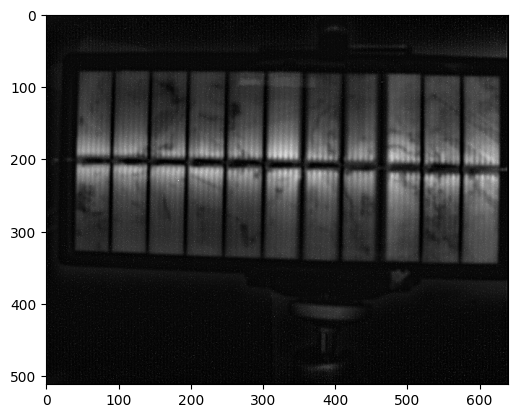

In [5]:
#img = cv.imread('/home/franklin/PVDefectDetect/Test_ImageJ/AVG_070A_8v.tif', 0)
img = cv.imread('D:/Documentos/Universidad de Cuenca/Trabajo de Titulación/PVDefectDetect/Test_ImageJ/AVG_070A_8v.tif', 0)
raw_module = MaskModule(img, 2, 11, 3) # 2 rows && 11 columns && 3 busbar
plt.imshow(raw_module.image, 'gray')

In [15]:
## Carga la mascara de la imagen
## Se usa el deslizador para encontrar el umbral adecuado

def update_mask(thre):
    mask = raw_module.load_mask(thre=thre, output=True)
    plt.figure(figsize=(8, 6))
    plt.imshow(mask, "gray")

thre = widgets.FloatSlider(value=0.6, min=0, max=1, step=0.05)
interactive(update_mask,
            thre=thre, description="Threshold")

interactive(children=(FloatSlider(value=0.6, description='thre', max=1.0, step=0.05), Output()), _dom_classes=…

In [19]:
## Carga la mascara de la imagen con el umbral establecido
thre.value

0.55

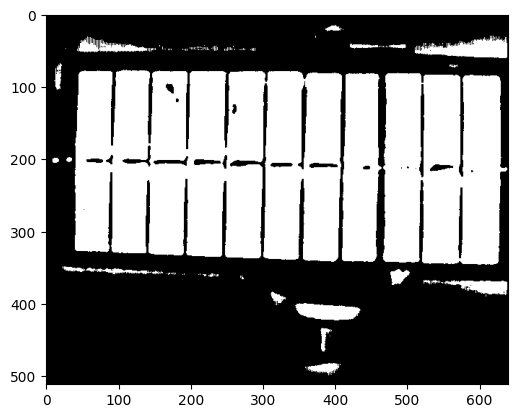

In [20]:
# Se almacenara la mascara en una instancia raw_module

plt.imshow(raw_module.mask, "gray")

In [21]:
# Detección de esquinas
# Se usa el deslizador para encontrar el mejor modo de detección de esquinas

def update_corner(mode):
    corners = raw_module.corner_detection_cont(output=True, mode=mode)
    x, y = zip(*corners)

    plt.figure(figsize=(8, 6))
    plt.imshow(raw_module.mask, 'gray')
    plt.scatter(x, y, c='r')

mode=widgets.IntSlider(value=0, min=0, max=4, step=1)
interactive(update_corner,
            mode=mode)

interactive(children=(IntSlider(value=0, description='mode', max=4), Output()), _dom_classes=('widget-interact…

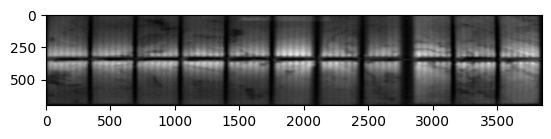

In [22]:
# Transformación de módulos

img_transformed = raw_module.transform(cellsize=350, img_only=True)
#img_transformed = raw_module.transform(600, 300, img_only=True)
plt.imshow(img_transformed, 'gray')
# define el tamaño de ña celda en fucnión del ancho y alto
#cellsize = 600

In [14]:
# Ajuste de parámetros para bordes verticales

def update_edges(vl_split_size, vl_interval, vl_margin, vl_thre):
    fig = plt.figure(figsize=(8, 6))
    raw_module.plot_peaks(n_list=[2, 5], split_size=vl_split_size,
                          interval=vl_interval, margin=vl_margin, thre=vl_thre, direction=0)

inner_edges_para = {
    'vl_interval': widgets.IntText(value=150),
    'vl_thre': widgets.FloatText(value=0.9),
    'vl_split_size': widgets.IntText(value=45),
    'vl_margin': widgets.IntText(value=200)
}

interactive(update_edges, **inner_edges_para)

interactive(children=(IntText(value=45, description='vl_split_size'), IntText(value=150, description='vl_inter…

In [81]:
# Ajuste de parámetros para bordes horizontales

def update_edges(hl_split_size, hl_interval, hl_margin, hl_thre):
    fig = plt.figure(figsize=(8, 6))
    raw_module.plot_peaks(n_list=[6], split_size=hl_split_size,
                          interval=hl_interval, margin=hl_margin, thre=hl_thre, direction=1)

inner_edges_para = {
    'hl_interval': widgets.IntText(value=200),
    'hl_thre': widgets.FloatText(value=0.9),
    'hl_split_size': widgets.IntText(value=45),
    'hl_margin': widgets.IntText(value=100)
}

interactive(update_edges, **inner_edges_para)

interactive(children=(IntText(value=45, description='hl_split_size'), IntText(value=200, description='hl_inter…

In [92]:
# Recorte de celdas

single_cells = raw_module.crop_cell(cellsize=32, plot=True)

IndexError: index 0 is out of bounds for axis 0 with size 0

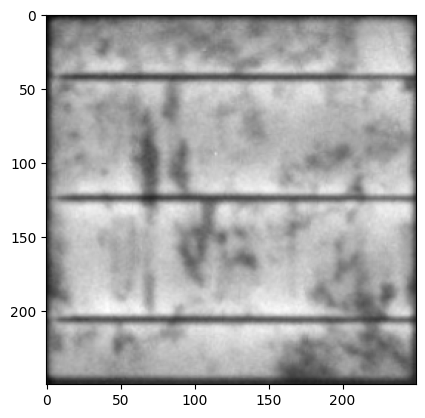

In [ ]:
# Presentación de una única celda

plt.imshow(single_cells[0], 'gray')